In [28]:
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn

## data preprocessing

In [2]:
df=pd.read_csv("Datasets/AS2(t-12).csv")
data=df["clave"]
df.drop(columns=["clave"],axis=1,inplace=True)
df['hour(t)']=list(np.arange(13,24))+list(np.arange(0,24))*1307
df=df.reindex(columns=['var1(t-12)','var2(t-12)','var3(t-12)','var4(t-12)','var5(t-12)','var6(t-12)','var7(t-12)','var8(t-12)','hour(t)','obj'])

print(df)
print(data)

       var1(t-12)  var2(t-12)  var3(t-12)  var4(t-12)  var5(t-12)  var6(t-12)  \
0             799      1442.0       658.0        76.0         0.0        36.0   
1             894       903.0       458.0        76.0         0.0        36.0   
2             760       397.0       190.0        76.0         0.0        36.0   
3             669       312.0       147.0        76.0         0.0        36.0   
4             665       299.0       124.0        76.0         0.0        36.0   
...           ...         ...         ...         ...         ...         ...   
31374         261       260.0       114.0       218.0         0.0       170.0   
31375         395       420.0       170.0       218.0         0.0       170.0   
31376         459       590.0       228.0       218.0         0.0       170.0   
31377         631       696.0       305.0       218.0         0.0       170.0   
31378         743       852.0       353.0       218.0         0.0       170.0   

       var7(t-12) var8(t-12

In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['var8(t-12)']=le.fit_transform(df['var8(t-12)'])
# le.transform(df['var8(t-12)'])
print(df)

       var1(t-12)  var2(t-12)  var3(t-12)  var4(t-12)  var5(t-12)  var6(t-12)  \
0             799      1442.0       658.0        76.0         0.0        36.0   
1             894       903.0       458.0        76.0         0.0        36.0   
2             760       397.0       190.0        76.0         0.0        36.0   
3             669       312.0       147.0        76.0         0.0        36.0   
4             665       299.0       124.0        76.0         0.0        36.0   
...           ...         ...         ...         ...         ...         ...   
31374         261       260.0       114.0       218.0         0.0       170.0   
31375         395       420.0       170.0       218.0         0.0       170.0   
31376         459       590.0       228.0       218.0         0.0       170.0   
31377         631       696.0       305.0       218.0         0.0       170.0   
31378         743       852.0       353.0       218.0         0.0       170.0   

       var7(t-12)  var8(t-1

In [4]:
def slicing_data(data,rows):
    x=list()
    y=list()
    for i in np.arange(rows-1,len(data)):
        y.append(data.iloc[i][-1])
        x.append([data.iloc[i-3][:-1],data.iloc[i-2][:-1],data.iloc[i-1][:-1],data.iloc[i][:-1]])
    
    return np.array(x).astype('float32'),np.array(y).astype('float32')


In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import  train_test_split


In [6]:

scaler=MinMaxScaler()
df[df.columns.difference(['obj'])]=scaler.fit_transform(df[df.columns.difference(['obj'])])

In [7]:
x,y=slicing_data(df,4)
print(x)
print(y)

[[[0.08009199 0.33433804 0.22783934 ... 0.27970296 0.33333334 0.5652174 ]
  [0.08959104 0.20936704 0.15858726 ... 0.27970296 0.33333334 0.6086956 ]
  [0.07619238 0.0920473  0.06578948 ... 0.27970296 0.33333334 0.65217394]
  [0.06709329 0.07233944 0.05090028 ... 0.27970296 0.33333334 0.6956522 ]]

 [[0.08959104 0.20936704 0.15858726 ... 0.27970296 0.33333334 0.6086956 ]
  [0.07619238 0.0920473  0.06578948 ... 0.27970296 0.33333334 0.65217394]
  [0.06709329 0.07233944 0.05090028 ... 0.27970296 0.33333334 0.6956522 ]
  [0.06669333 0.0693253  0.04293629 ... 0.27970296 0.33333334 0.73913044]]

 [[0.07619238 0.0920473  0.06578948 ... 0.27970296 0.33333334 0.65217394]
  [0.06709329 0.07233944 0.05090028 ... 0.27970296 0.33333334 0.6956522 ]
  [0.06669333 0.0693253  0.04293629 ... 0.27970296 0.33333334 0.73913044]
  [0.05339466 0.0839323  0.04466759 ... 0.27970296 0.33333334 0.7826087 ]]

 ...

 [[0.02489751 0.03825643 0.02285319 ... 0.64851487 1.         0.7826087 ]
  [0.02629737 0.06028287 0

In [8]:
print(x[0].shape)
print(y.shape)

(4, 9)
(31376,)


In [9]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.333,random_state=101)

In [10]:
 y_test.shape

(10449,)

# model training

In [11]:
import tensorflow.keras.layers as layers

In [12]:
input_layer=layers.Input(shape=(4,9,1))
layer_1=layers.TimeDistributed(layers.Conv1D(filters=256,kernel_size=2,activation="relu"))(input_layer)
layer_2=layers.TimeDistributed(layers.MaxPool1D(pool_size=2, padding='same'))(layer_1)
layer_3=layers.TimeDistributed(layers.Flatten())(layer_2)
layer_4=layers.Dropout(0.5)(layer_3)
layer_5=layers.Bidirectional(layers.LSTM(500, activation = 'relu'))(layer_4)
output_layer=layers.Dense(1)(layer_5)
model_1=tf.keras.Model(inputs=input_layer,outputs=output_layer)


In [15]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4, 9, 1)]         0         
                                                                 
 time_distributed (TimeDist  (None, 4, 8, 256)         768       
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 4, 4, 256)         0         
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, 4, 1024)           0         
 stributed)                                                      
                                                                 
 dropout (Dropout)           (None, 4, 1024)           0         
                                                             

In [14]:
model_1.compile(optimizer='adam',loss='mae',metrics=[tf.keras.metrics.RootMeanSquaredError()])
history_1=model_1.fit(X_train,y_train,epochs=100,batch_size = 32, shuffle=True,validation_data=(X_test,y_test))

Epoch 1/100
654/654 [==============================] - 124s 185ms/step - loss: 236.2340 - root_mean_squared_error: 328.7312 - val_loss: 183.7363 - val_root_mean_squared_error: 264.6192
Epoch 2/100
654/654 [==============================] - 121s 186ms/step - loss: 175.5888 - root_mean_squared_error: 257.3386 - val_loss: 144.1066 - val_root_mean_squared_error: 220.3654
Epoch 3/100
654/654 [==============================] - 128s 196ms/step - loss: 152.4103 - root_mean_squared_error: 229.3621 - val_loss: 131.2068 - val_root_mean_squared_error: 203.1330
Epoch 4/100
654/654 [==============================] - 125s 192ms/step - loss: 142.3057 - root_mean_squared_error: 218.7889 - val_loss: 124.6777 - val_root_mean_squared_error: 194.2511
Epoch 5/100
654/654 [==============================] - 122s 186ms/step - loss: 134.0821 - root_mean_squared_error: 208.3874 - val_loss: 119.0502 - val_root_mean_squared_error: 189.5538
Epoch 6/100
654/654 [==============================] - 121s 185ms/step - lo

# model evaluation

In [17]:
model_1.save('model_1.h5')

c:\Users\kesav\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [48]:
from tensorflow.keras.models import load_model

In [49]:
savedModel=load_model('model_1.h5')
savedModel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4, 9, 1)]         0         
                                                                 
 time_distributed (TimeDist  (None, 4, 8, 256)         768       
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 4, 4, 256)         0         
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, 4, 1024)           0         
 stributed)                                                      
                                                                 
 dropout (Dropout)           (None, 4, 1024)           0         
                                                             

In [52]:
pred=savedModel.predict(X_test)
pred

327/327 [==============================] - 13s 38ms/step


array([[ 34.157825],
       [ 25.100216],
       [313.311   ],
       ...,
       [227.22293 ],
       [400.66428 ],
       [931.395   ]], dtype=float32)

In [53]:
pred=pred.reshape(pred.shape[0])
y_test=y_test.reshape(y_test.shape[0])

In [54]:
MAE = sklearn.metrics.mean_absolute_error(pred,y_test)
print(MAE)

63.64144


In [55]:
import random

In [110]:

rand=random.randint(0,30000)
rand

1564

In [111]:
y1=y[rand:rand+500]
x1=savedModel.predict(x[rand:rand+500])


16/16 [==============================] - 1s 38ms/step


In [112]:
x1=x1.reshape(x1.shape[0])
x1

array([ 476.06863 ,  308.64767 ,  233.46774 ,  159.22653 ,   89.55331 ,
         46.627037,   35.62366 ,   27.944881,   53.97044 ,  186.95694 ,
        676.634   , 1069.1488  ,  915.9479  ,  797.75745 ,  814.0528  ,
        819.60266 ,  825.1929  ,  871.3434  ,  870.05884 ,  930.8875  ,
        944.04443 , 1014.9595  ,  996.16284 ,  736.57513 ,  507.5658  ,
        307.46588 ,  219.56763 ,  153.70872 ,   85.552505,   42.493156,
         35.303173,   28.360153,   57.519085,  177.59785 ,  660.6719  ,
       1043.5171  ,  902.7258  ,  770.78503 ,  809.66785 ,  820.27246 ,
        815.18195 ,  823.66455 ,  855.22034 ,  900.32776 ,  886.75354 ,
        819.7375  ,  772.20184 ,  730.7136  ,  568.66315 ,  340.1128  ,
        243.13449 ,  208.17188 ,  128.57727 ,   77.45363 ,   59.52729 ,
         51.87457 ,   43.645153,   87.27215 ,  205.65164 ,  228.69107 ,
        358.28635 ,  468.07956 ,  545.0637  ,  598.8269  ,  668.062   ,
        645.9762  ,  434.50854 ,  424.68246 ,  494.33273 ,  554.

In [113]:
import matplotlib.pylab as plt

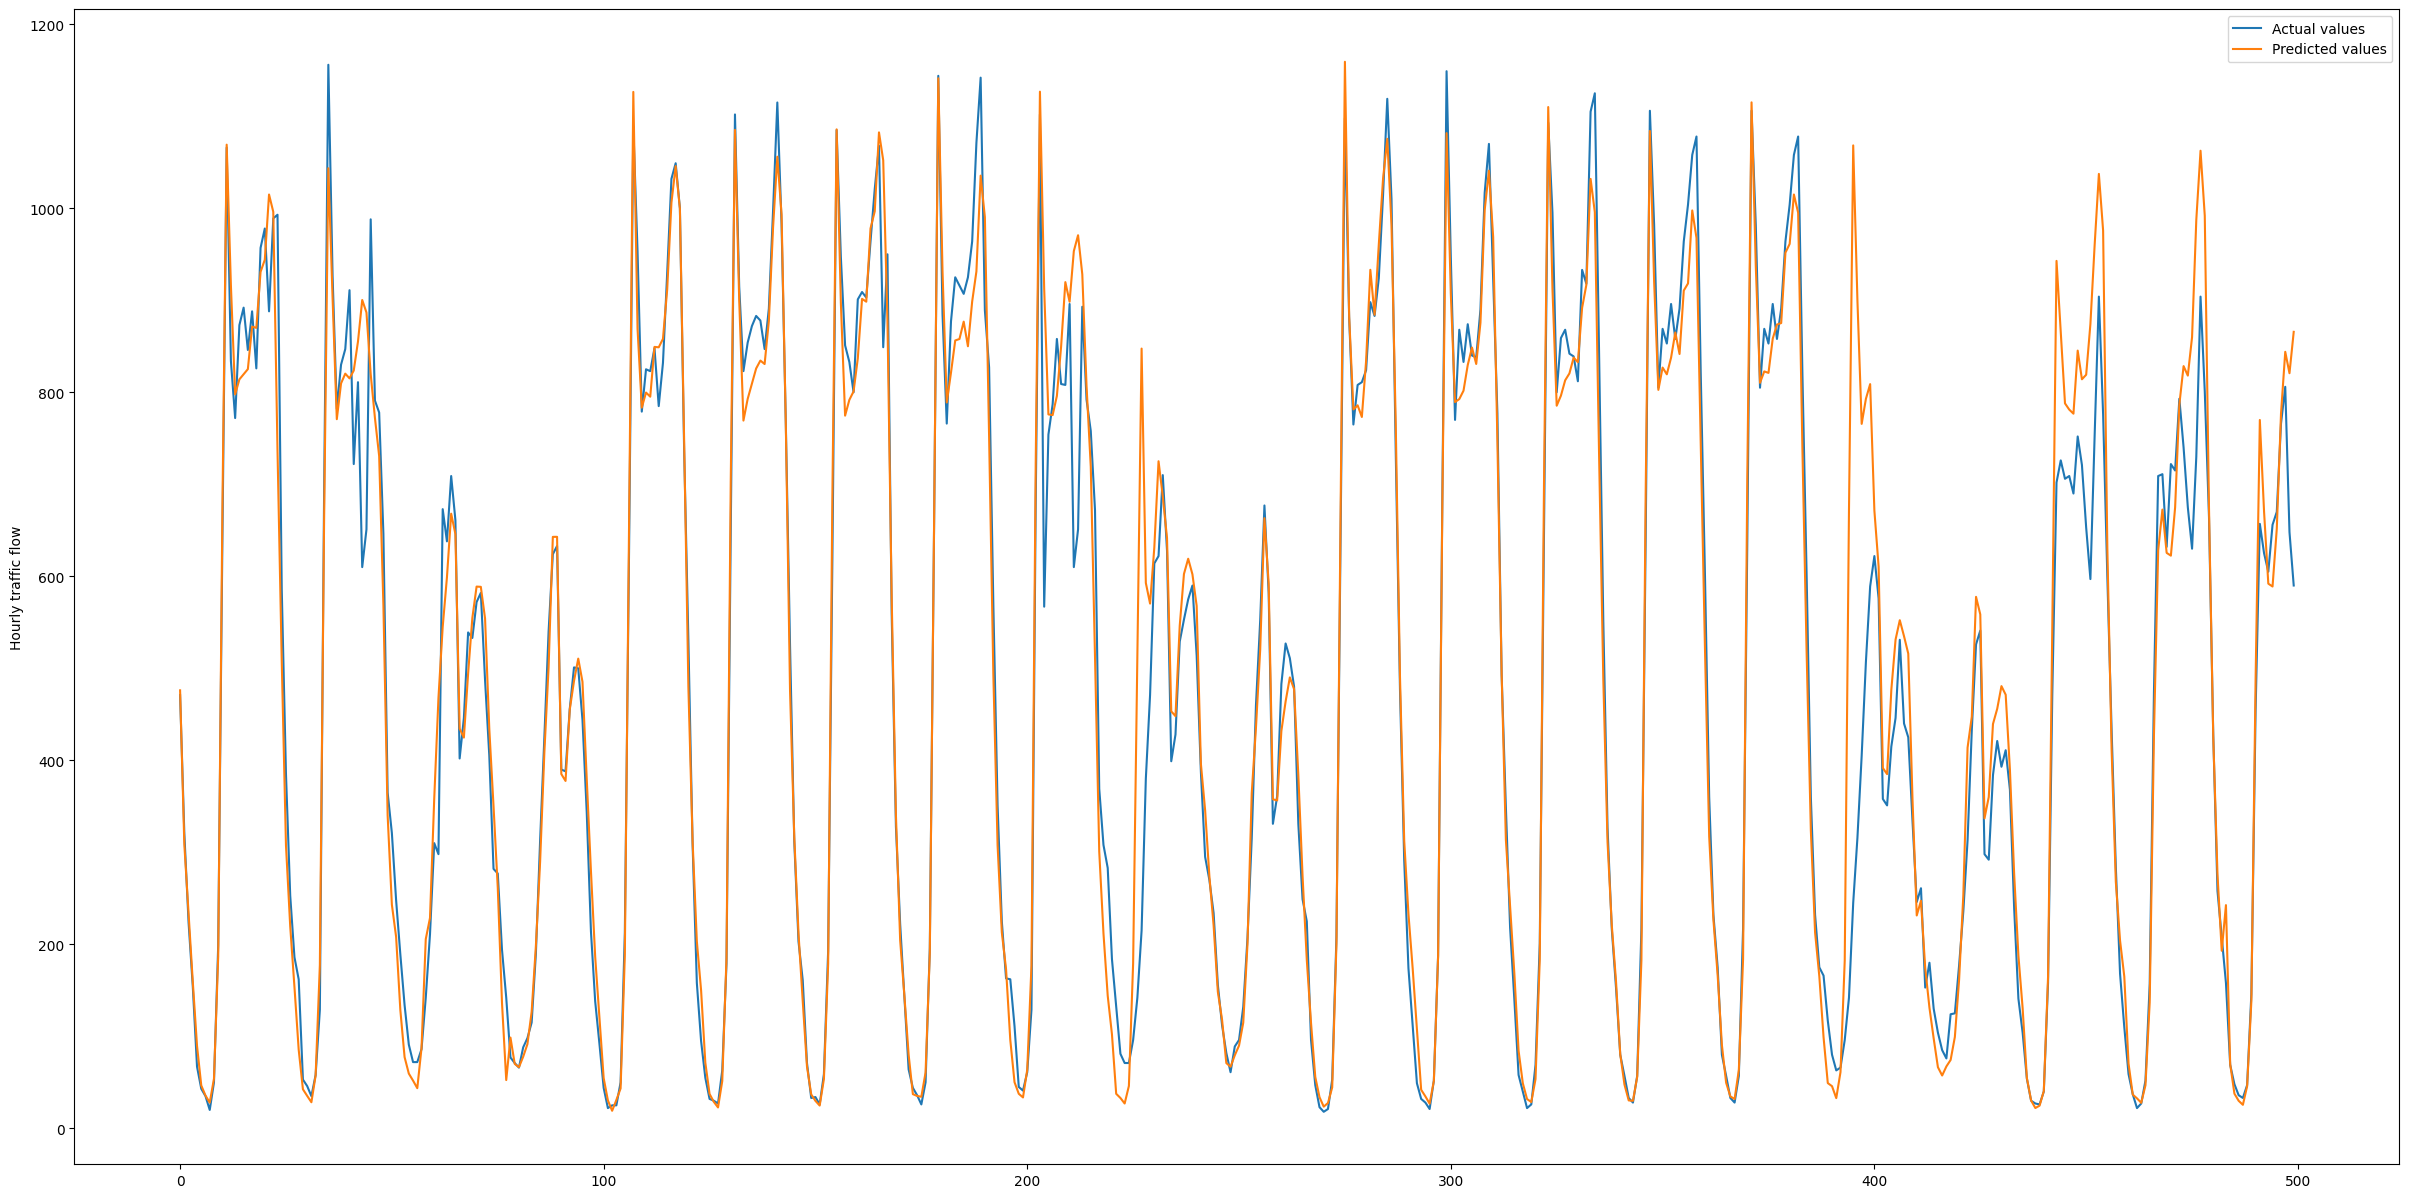

In [114]:
plt.figure(figsize=(30, 15))
plt.plot(y1, label = "Actual values")
plt.plot(x1, label = "Predicted values")
plt.legend()
plt.ylabel('Hourly traffic flow')
plt.show()